# Import Libraries and Data

In [363]:
# Import Libraries
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [258]:
# Import Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Preparation
### 1. Exploration

In [259]:
# Review Data Structure
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [260]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

### 2. Cleaning

#### Train Dataset

In [261]:
# Quantify Missing Data by Feature
pd.DataFrame({'Percent Missing':(train.isnull().sum()/len(train)*100).sort_values(ascending=False)}).head(20)

,Percent Missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [262]:
# Impute Missing Data by Feature
train = train.fillna(value={'MiscFeature':'None', 'Alley':'None', 'Fence':'None', 'Electrical':'SBrkr',
                           'FireplaceQu':'None', 'GarageType':'None', 'GarageCond':'None',
                           'GarageFinish':'None', 'GarageQual':'None', 'GarageYrBlt':0, 'BsmtFinType1':'None',
                           'BsmtExposure':'None', 'BsmtQual':'None', 'BsmtCond':'None',
                           'BsmtFinType2':'None', 'MasVnrArea':0, 'MasVnrType':'None', 'PoolQC':'None'})
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [263]:
# Ensure Common Attributes Match Across Features
train['HasBsmt'] = 'NoData'
train.at[332, 'BsmtFinType2']='Unf'
train.at[948, 'BsmtExposure']='No'
for i in range(len(train)):
    if (train['BsmtQual'][i] != 'None') & (train['BsmtCond'][i] != 'None') & (train['BsmtExposure'][i] != 'None') \
        & (train['BsmtFinType1'][i] != 'None') & (train['BsmtFinType2'][i] != 'None') & (train['TotalBsmtSF'][i] > 0):
        train.at[i, 'HasBsmt'] = 'Yes'
    elif (train['BsmtQual'][i] == 'None') & (train['BsmtCond'][i] == 'None') & (train['BsmtExposure'][i] == 'None') \
        & (train['BsmtFinType1'][i] == 'None') & (train['BsmtFinType2'][i] == 'None') & (train['TotalBsmtSF'][i] == 0):
        train.at[i, 'HasBsmt'] = 'No'
    else: 
        train.at[i, 'HasBsmt'] = 'Unclear'

In [264]:
train['HasGarage'] = 'NoData'
for i in range(len(train)):
    if (train['GarageType'][i] != 'None') & (train['GarageYrBlt'][i] != 0) & (train['GarageFinish'][i] != 'None') \
        & (train['GarageCars'][i] > 0) & (train['GarageArea'][i] > 0) & (train['GarageQual'][i] != 'None') \
        & (train['GarageCond'][i] != 'None'):
        train.at[i, 'HasGarage'] = 'Yes'
    elif (train['GarageType'][i] == 'None') & (train['GarageYrBlt'][i] == 0) & (train['GarageFinish'][i] == 'None') \
        & (train['GarageCars'][i] == 0) & (train['GarageArea'][i] == 0) & (train['GarageQual'][i] == 'None') \
        & (train['GarageCond'][i] == 'None'):
        train.at[i, 'HasGarage'] = 'No'
    else: 
        train.at[i, 'HasGarage'] = 'Unclear'

In [265]:
train.shape

(1460, 83)

#### Test Dataset

In [266]:
# Quantify Missing Data by Feature
pd.DataFrame({'Percent Missing':(test.isnull().sum()/len(test)*100).sort_values(ascending=False)}).head(20)

,Percent Missing
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageQual,5.346127
GarageYrBlt,5.346127
GarageFinish,5.346127


In [267]:
# Impute Missing Data by Feature
test = test.fillna(value={'MiscFeature':'None', 'Alley':'None', 'Fence':'None', 'Electrical':'SBrkr',
                         'FireplaceQu':'None', 'GarageType':'None', 'GarageCond':'None',
                         'GarageFinish':'None', 'GarageQual':'None', 'GarageYrBlt':0, 'BsmtFinType1':'None',
                         'BsmtExposure':'None', 'BsmtQual':'None', 'BsmtCond':'None',
                         'BsmtFinType2':'None', 'MasVnrArea':0, 'MasVnrType':'None', 'PoolQC':'None'})
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [268]:
# Ensure Common Attributes Match Across Features
test['HasBsmt'] = 'NoData'
test.at[27, 'BsmtExposure']='No'
test.at[580, 'BsmtCond']='TA'
test.at[725, 'BsmtCond']='TA'
test.at[757, 'BsmtQual']='TA'
test.at[758, 'BsmtQual']='TA'
test.at[888, 'BsmtExposure']='No'
test.at[1064, 'BsmtCond']='TA'
for i in range(len(test)):
    if (test['BsmtQual'][i] != 'None') & (test['BsmtCond'][i] != 'None') & (test['BsmtExposure'][i] != 'None') \
        & (test['BsmtFinType1'][i] != 'None') & (test['BsmtFinType2'][i] != 'None') & (test['TotalBsmtSF'][i] > 0):
        test.at[i, 'HasBsmt'] = 'Yes'
    elif (test['BsmtQual'][i] == 'None') & (test['BsmtCond'][i] == 'None') & (test['BsmtExposure'][i] == 'None') \
        & (test['BsmtFinType1'][i] == 'None') & (test['BsmtFinType2'][i] == 'None') & (test['TotalBsmtSF'][i] == 0):
        test.at[i, 'HasBsmt'] = 'No'
    else: 
        test.at[i, 'HasBsmt'] = 'Unclear'

In [269]:
test['HasGarage'] = 'NoData'
test.at[666, 'GarageYrBlt']=test.GarageYrBlt.median()
test.at[666, 'GarageFinish']='Unf'
test.at[666, 'GarageQual']='TA'
test.at[666, 'GarageCond']='TA'
test.at[1116, 'GarageYrBlt']=test.GarageYrBlt.median()
test.at[1116, 'GarageFinish']='Unf'
test.at[1116, 'GarageCars']=test.GarageCars.median()
test.at[1116, 'GarageArea']=test.GarageArea.median()
test.at[1116, 'GarageQual']='TA'
test.at[1116, 'GarageCond']='TA'
for i in range(len(test)):
    if (test['GarageType'][i] != 'None') & (test['GarageYrBlt'][i] != 0) & (test['GarageFinish'][i] != 'None') \
        & (test['GarageCars'][i] > 0) & (test['GarageArea'][i] > 0) & (test['GarageQual'][i] != 'None') \
        & (test['GarageCond'][i] != 'None'):
        test.at[i, 'HasGarage'] = 'Yes'
    elif (test['GarageType'][i] == 'None') & (test['GarageYrBlt'][i] == 0) & (test['GarageFinish'][i] == 'None') \
        & (test['GarageCars'][i] == 0) & (test['GarageArea'][i] == 0) & (test['GarageQual'][i] == 'None') \
        & (test['GarageCond'][i] == 'None'):
        test.at[i, 'HasGarage'] = 'No'
    else: 
        test.at[i, 'HasGarage'] = 'Unclear'

In [270]:
# More In-depth Cleaning
test[test.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,HasGarage
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal,Yes,Yes
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,No,Yes
485,1946,20,RL,63.0,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,None,Shed,750,5,2008,WD,Normal,Yes,Yes
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml,Unclear,Yes
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,None,0.0,None,0.0,0.0,None,None,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal,Yes,No
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal,No,Yes
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,No,Yes
790,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal,Yes,Yes
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml,Ye

In [271]:
test = test.fillna(value={'MSZoning':'RL', 'Utilities':'AllPub', 'Exterior1st':'None', 'Exterior2nd':'None',
                         'BsmtFinSF1':0, 'BsmtFinSF2':0, 'BsmtUnfSF':0, 'TotalBsmtSF':0, 'BsmtFullBath': 0,
                         'BsmtHalfBath':0, 'Functional':'Typ', 'GarageCars':0, 'GarageArea':0, 'SaleType':'WD',
                         'KitchenQual':'TA'})

### 3. Feature Engineering

In [323]:
# Save Dataset Details
len_train = train.shape[0]
len_test = test.shape[0]
y_train = train['SalePrice'].to_frame()

In [324]:
# Combine Datasets
data = pd.concat((train, test), sort=False).reset_index(drop=True)

In [325]:
# Drop Uniform/Uninformative Features and SalePrice
data.drop('Id', axis=1, inplace=True)
data.drop('Street', axis=1, inplace=True)
data.drop('Utilities', axis=1, inplace=True)
data.drop('Condition2', axis=1, inplace=True)
data.drop('PoolQC', axis=1, inplace=True)
data.drop('PoolArea', axis=1, inplace=True)
data.drop('SalePrice', axis=1, inplace=True)

In [326]:
# Create New Features
data['HouseAge'] = 2020 - ((data['YearBuilt'] + data['YearRemodAdd']) / 2)
data['TotBath'] = (data['FullBath'] + (data['HalfBath'] / 2))
data.shape

(2919, 78)

In [327]:
# Correct Feature Properties and Attributes
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
to_string = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
data[to_string] = data[to_string].astype(str)
to_int = ['BsmtFullBath', 'BsmtHalfBath']
data[to_int] = data[to_int].astype(int)
to_float = ['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch']
data[to_float] = data[to_float].astype(float)
data['MSZoning'].replace('C (all)', 'C', inplace=True)

In [328]:
# Encode Heirarchical Features
heir_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                'GarageCond', 'PavedDrive']
heir_order = [['IR3', 'IR2', 'IR1', 'Reg'], ['Sev', 'Mod', 'Gtl'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA',
             'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             ['None', 'No', 'Mn', 'Av', 'Gd'], ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['None', 'Unf',
             'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['None', 'Unf', 'RFn', 'Fin'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['N','P','Y']]
for i in range(len(heir_order)): 
    ord_en = OrdinalEncoder(categories={0:heir_order[i]})
    data.loc[:, heir_features[i]] = ord_en.fit_transform(data.loc[:, heir_features[i]].values.reshape(-1, 1))
data[heir_features] = data[heir_features].astype(int)

In [414]:
# Re-divide Train and Test
Train = copy.deepcopy(data[:len_train])
Train['SalePrice'] = y_train
Test = copy.deepcopy(data[len_test+1:])

# Response Variable

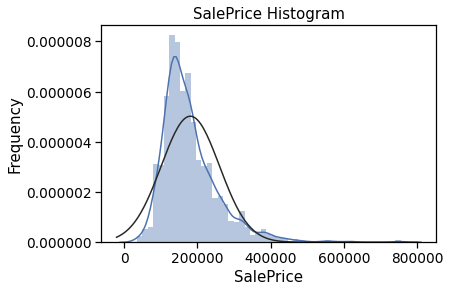

In [415]:
# SalePrice Distribution
sns.distplot(Train['SalePrice'], fit=norm)
plt.title('SalePrice Histogram')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')

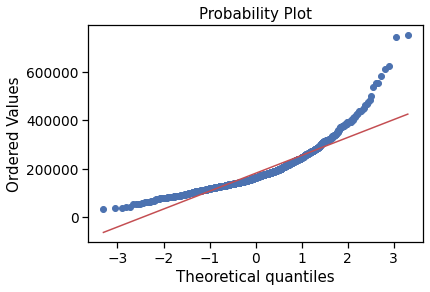

In [416]:
# SalePrice QQ-Plot
plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [417]:
# Log Transform to Correct Right-Skew
Train['SalePrice'] = np.log1p(Train['SalePrice'])

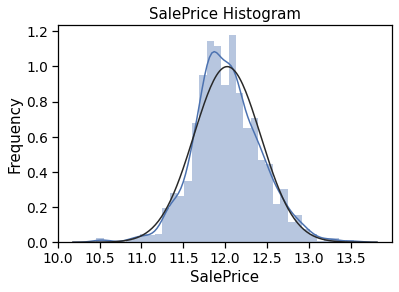

In [418]:
# Corrected SalePrice Distribution
sns.distplot(Train['SalePrice'], fit=norm)
plt.title('SalePrice Histogram')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')

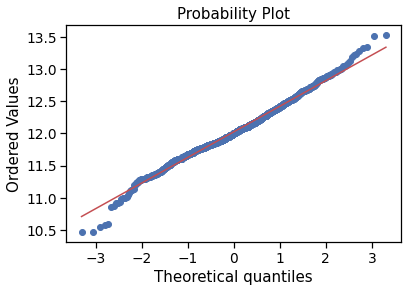

In [419]:
# SalePrice QQ-Plot
plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

# Quantitative Features

In [424]:
# View Quantitative Features
quant_features = Train.dtypes[Train.dtypes != 'object'].index
print(', '.join(str(p) for p in quant_features)) 

LotFrontage, LotArea, LotShape, LandSlope, OverallQual, OverallCond, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, HouseAge, TotBath, SalePrice


In [427]:
# Test for Skew
quant_skew = pd.DataFrame({'Skew':(Train[quant_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False))})
quant_skew.head(10)

,Skew
MiscVal,24.451640
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
BsmtFinType2,3.299533
EnclosedPorch,3.086696


In [428]:
# Adjust High Skew Using Box Cox Transformation
high_skew = quant_skew[quant_skew['Skew'].abs() > 1]
skewed_features = high_skew.index
lam = 0.15
for feature in skewed_features:
    Train[feature] = boxcox1p(Train[feature], lam)

In [429]:
# Check Adjusted Skew
adj_skew = pd.DataFrame({'Skew':(Train[quant_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False))})
adj_skew.head(10)

,Skew
3SsnPorch,7.827826
LowQualFinSF,7.593301
MiscVal,5.505530
KitchenAbvGr,3.995746
BsmtHalfBath,3.943685
ScreenPorch,3.184431
BsmtFinSF2,2.619350
BsmtFinType2,2.168237
EnclosedPorch,2.160966
BsmtUnfSF,0.919323


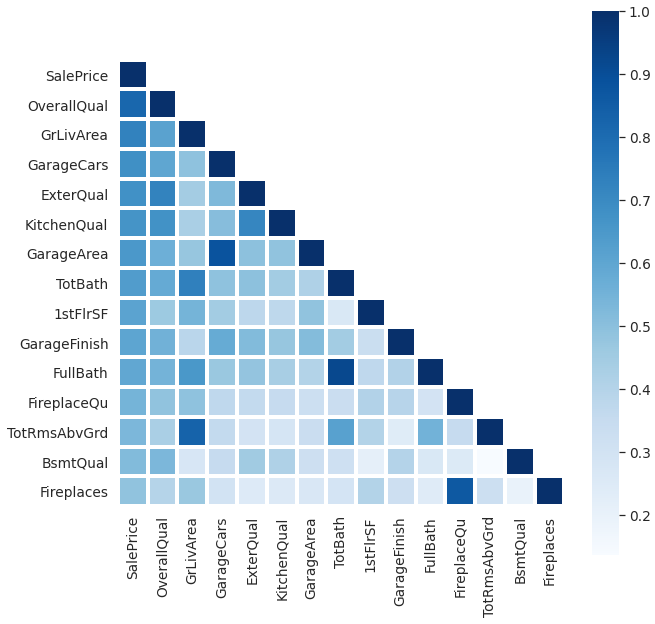

In [430]:
# Correlation Heatmap
n = 15
params = Train.corr().nlargest(n, 'SalePrice').index
coefs = np.corrcoef(Train[params].values.T)
mask = np.zeros_like(coefs)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set(font_scale=1.25)
    sns.heatmap(coefs, cmap='Blues', cbar=True, annot=False, square=True, fmt='.1f', annot_kws={'size':12},
                yticklabels=params.values, xticklabels=params.values, linewidths=3, linecolor='white', mask=mask)
#     plt.title('Feature Correlation Heatmap', fontsize=30, fontdict={'horizontalalignment':'center'},
#                pad=75)
#     plt.savefig('CorrMap_10.png')

# Qualitative Features

In [431]:
# View Qualitative Features
qual_features = Train.dtypes[Train.dtypes == 'object'].index
print(', '.join(str(p) for p in qual_features)) 

MSSubClass, MSZoning, Alley, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, GarageYrBlt, Fence, MiscFeature, MoSold, YrSold, SaleType, SaleCondition, HasBsmt, HasGarage


In [432]:
# Order Feature Attributes by Mean Sale Price
order_mssubclass = Train.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=False).index
order_mszoning = Train.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False).index
order_neighborhood = Train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index
order_garagetype = Train.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=False).index

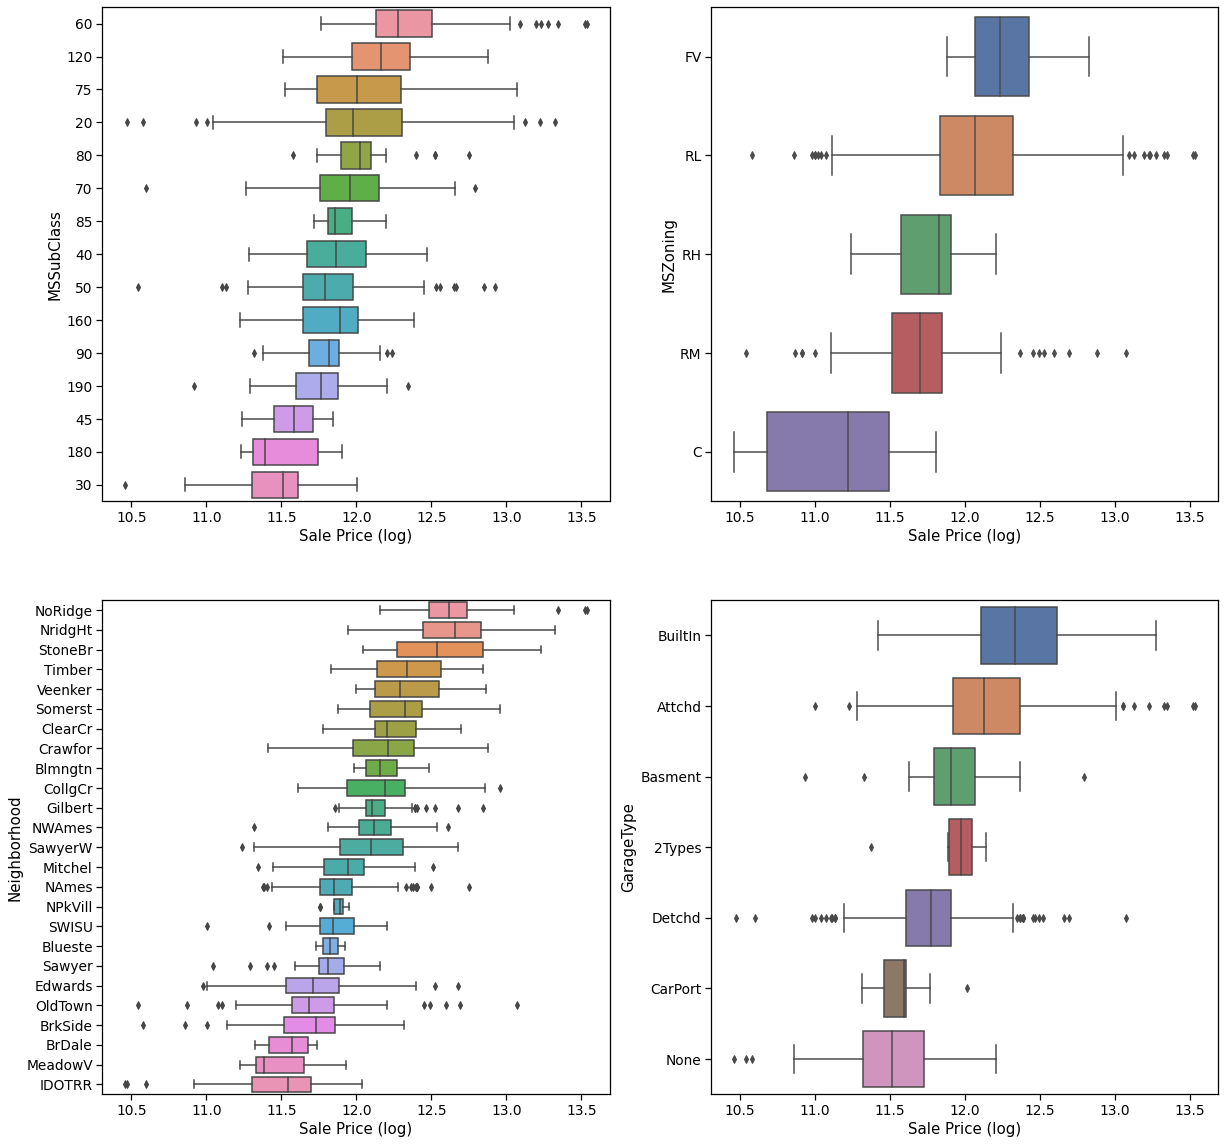

In [433]:
f, axs = plt.subplots(2, 2, figsize=(20, 20))

sns.boxplot('SalePrice', 'MSSubClass', data=Train, orient='h', 
            order=order_mssubclass, ax=axs[0, 0]).set(xlabel='Sale Price (log)')
sns.boxplot('SalePrice', 'MSZoning', data=Train, orient='h', 
            order=order_mszoning, ax=axs[0, 1]).set(xlabel='Sale Price (log)')
sns.boxplot('SalePrice', 'Neighborhood', data=Train, orient='h', 
            order=order_neighborhood, ax=axs[1, 0]).set(xlabel='Sale Price (log)')
sns.boxplot('SalePrice', 'GarageType', data=Train, orient='h', 
            order=order_garagetype, ax=axs[1, 1]).set(xlabel='Sale Price (log)')
# plt.savefig('Qual_Feat_Boxplots.png')

# Modeling